In [1]:
import os

if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")

In [2]:
import datajoint as dj
from pathlib import Path
import numpy as np

# from keypoint_moseq import setup_project , load_config
# from element_moseq.readers.kpms_reader import load_dj_config, generate_dj_config

In [7]:
from tutorial_pipeline import lab, subject, session, kpms_pca, kpms_model

[2024-03-12 00:13:11,809][WARNING]: lab.Project and related tables will be removed in a future version of Element Lab. Please use the project schema.


## 1. PCA MODEL AND LATENT DIMENSIONS


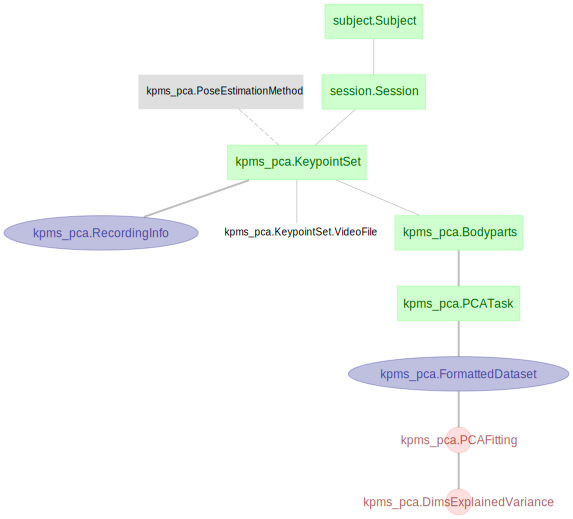

In [8]:
(
    dj.Diagram(subject.Subject)
    + dj.Diagram(session.Session)
    + dj.Diagram(kpms_pca)
    #    + dj.Diagram(kpms_model)
)

In [9]:
kpms_pca.KeypointSet()

subject,session_datetime,kpset_id,"format_method deeplabcut, sleap, anipose, sleap-anipose, nwb, facemap,",kpset_config_dir Path relative to root data directory where the config file is located,kpset_videos_dir Path relative to root data directory where the videos and their keypoints are located,kpset_desc Optional. User-entered description


In [10]:
# Subject and Session tables
subject.Subject.insert1(
    dict(
        subject="subject1",
        sex="F",
        subject_birth_date="2020-01-01",
        subject_description="test",
    ),
    skip_duplicates=True,
)

# Definition of the dictionary named "session_keys"
session_keys = [
    dict(subject="subject1", session_datetime="2021-06-02 14:04:22"),
    dict(subject="subject1", session_datetime="2021-06-03 14:43:10"),
]

# Insert this dictionary in the Session table
session.Session.insert(session_keys, skip_duplicates=True)

In [11]:
kpms_pca.PoseEstimationMethod()

"format_method deeplabcut, sleap, anipose, sleap-anipose, nwb, facemap,",pose_estimation_desc Optional. Pose estimation method description
anipose,`.csv` files generated by anipose analysis
deeplabcut,`.csv` and `.h5/.hdf5` files generated by DeepLabcut analysis
facemap,`.h5` files generated by Facemap analysis
nwb,`.nwb` files with Neurodata Without Borders (NWB) format
sleap,`.slp` and `.h5/.hdf5` files generated by SLEAP analysis
sleap-anipose,`.h5/.hdf5` files generated by sleap-anipose analysis


In [12]:
kpset_key = dict(subject="subject1", session_datetime="2021-06-02 14:04:22", kpset_id=1)

kpms_pca.KeypointSet.insert1(
    {
        **kpset_key,
        "format_method": "deeplabcut",
        "kpset_config_dir": "/Users/milagros/Documents/datajoint-elements/element-moseq/data/inbox/input_data",
        "kpset_videos_dir": "/Users/milagros/Documents/datajoint-elements/element-moseq/data/inbox/input_data/videos",
        "kpset_desc": "testing kpms pca schema",
    },
    skip_duplicates=True,
)

In [13]:
kpms_pca.KeypointSet()

subject,session_datetime,kpset_id,"format_method deeplabcut, sleap, anipose, sleap-anipose, nwb, facemap,",kpset_config_dir Path relative to root data directory where the config file is located,kpset_videos_dir Path relative to root data directory where the videos and their keypoints are located,kpset_desc Optional. User-entered description
subject1,2021-06-02 14:04:22,1,deeplabcut,/Users/milagros/Documents/datajoint-elements/element-moseq/data/inbox/input_data,/Users/milagros/Documents/datajoint-elements/element-moseq/data/inbox/input_data/videos,testing kpms pca schema


In [14]:
video_files = [
    "/Users/milagros/Documents/datajoint-elements/element-moseq/data/inbox/input_data/videos/21_11_8_one_mouse.top.ir.Mp4",
    "/Users/milagros/Documents/datajoint-elements/element-moseq/data/inbox/input_data/videos/21_12_2_def6a_1.top.ir.mp4",
    "/Users/milagros/Documents/datajoint-elements/element-moseq/data/inbox/input_data/videos/21_12_2_def6b_2.top.ir.mp4",
]

kpms_pca.KeypointSet.VideoFile.insert(
    (
        {**kpset_key, "video_id": v_idx, "video_path": Path(f)}
        for v_idx, f in enumerate(video_files)
    ),
    skip_duplicates=True,
)

In [15]:
kpms_pca.KeypointSet.VideoFile()

subject,session_datetime,kpset_id,video_id,"video_path Filepath of each video, relative to root data directory"
subject1,2021-06-02 14:04:22,1,0,/Users/milagros/Documents/datajoint-elements/element-moseq/data/inbox/input_data/videos/21_11_8_one_mouse.top.ir.Mp4
subject1,2021-06-02 14:04:22,1,1,/Users/milagros/Documents/datajoint-elements/element-moseq/data/inbox/input_data/videos/21_12_2_def6a_1.top.ir.mp4
subject1,2021-06-02 14:04:22,1,2,/Users/milagros/Documents/datajoint-elements/element-moseq/data/inbox/input_data/videos/21_12_2_def6b_2.top.ir.mp4


In [16]:
kpms_pca.RecordingInfo()

subject,session_datetime,kpset_id,px_height_average Height in pixels,px_width_average Width in pixels,nframes_average Number of frames,"fps_average Optional. Frames per second, Hz",recording_datetime Optional. Datetime for the start of the recording,recording_duration_average Video duration (s) from nframes / fps


In [17]:
kpms_pca.RecordingInfo.populate()

In [18]:
kpms_pca.RecordingInfo()

subject,session_datetime,kpset_id,px_height_average Height in pixels,px_width_average Width in pixels,nframes_average Number of frames,"fps_average Optional. Frames per second, Hz",recording_datetime Optional. Datetime for the start of the recording,recording_duration_average Video duration (s) from nframes / fps
subject1,2021-06-02 14:04:22,1,576,640,95517,30,None,3183.0


In [19]:
kpms_pca.Bodyparts()

subject,session_datetime,kpset_id,bodyparts_id,bodyparts_desc,anterior_bodyparts List of strings of anterior bodyparts,posterior_bodyparts List of strings of posterior bodyparts,use_bodyparts List of strings of bodyparts to be used


In [20]:
bodypart_key = {**kpset_key, "bodyparts_id": 1}
kpms_pca.Bodyparts.insert1(
    {
        **bodypart_key,
        "anterior_bodyparts": ["nose"],
        "posterior_bodyparts": ["spine2"],
        "use_bodyparts": [
            "spine4",
            "spine3",
            "spine2",
            "spine1",
            "head",
            "nose",
            "right ear",
            "left ear",
        ],
    },
    skip_duplicates=True,
)

In [21]:
kpms_pca.Bodyparts()

subject,session_datetime,kpset_id,bodyparts_id,bodyparts_desc,anterior_bodyparts List of strings of anterior bodyparts,posterior_bodyparts List of strings of posterior bodyparts,use_bodyparts List of strings of bodyparts to be used
subject1,2021-06-02 14:04:22,1,1,,=BLOB=,=BLOB=,=BLOB=


In [22]:
kpms_pca.PCATask()

subject,session_datetime,kpset_id,bodyparts_id,output_dir KPMS's output directory in config relative to root,"task_mode 'load': load computed analysis results, 'trigger': trigger computation"


In [23]:
kpms_pca.PCATask.insert1(
    {
        **bodypart_key,
        "output_dir": "/Users/milagros/Documents/datajoint-elements/element-moseq/data/outbox/kpms_project2",
        "task_mode": "trigger",
    },
    skip_duplicates=True,
)

In [24]:
kpms_pca.PCATask()

subject,session_datetime,kpset_id,bodyparts_id,output_dir KPMS's output directory in config relative to root,"task_mode 'load': load computed analysis results, 'trigger': trigger computation"
subject1,2021-06-02 14:04:22,1,1,/Users/milagros/Documents/datajoint-elements/element-moseq/data/outbox/kpms_project2,trigger


In [36]:
key = (kpms_pca.PCATask & "task_mode = 'trigger'").fetch1("KEY")
key

{'subject': 'subject1',
 'session_datetime': datetime.datetime(2021, 6, 2, 14, 4, 22),
 'kpset_id': 1,
 'bodyparts_id': 1}

In [26]:
kpms_pca.FormattedDataset()

subject,session_datetime,kpset_id,bodyparts_id,coordinates,confidences,formatted_bodyparts


In [27]:
kpms_pca.FormattedDataset.populate()

ACTION REQUIRED: `anterior_bodyparts` contains BODYPART1 which is not
  one of the options in `use_bodyparts`.

ACTION REQUIRED: `posterior_bodyparts` contains BODYPART3 which is not
  one of the options in `use_bodyparts`.



Loading keypoints: 100%|████████████████| 10/10 [00:00<00:00, 16.01it/s]


In [28]:
kpms_pca.FormattedDataset()

subject,session_datetime,kpset_id,bodyparts_id,coordinates,confidences,formatted_bodyparts
subject1,2021-06-02 14:04:22,1,1,=BLOB=,=BLOB=,=BLOB=


In [29]:
kpms_pca.PCAFitting()

subject,session_datetime,kpset_id,bodyparts_id,pca_fitting_time Time of generation of the PCA fitting analysis


In [30]:
kpms_pca.PCAFitting.populate()

In [31]:
kpms_pca.PCAFitting()

subject,session_datetime,kpset_id,bodyparts_id,pca_fitting_time Time of generation of the PCA fitting analysis
subject1,2021-06-02 14:04:22,1,1,2024-03-11 23:13:55


In [32]:
kpms_pca.DimsExplainedVariance()

subject,session_datetime,kpset_id,bodyparts_id,variance_percentage,dims_explained_variance,latent_dim_desc


In [33]:
kpms_pca.DimsExplainedVariance.populate()

In [34]:
kpms_pca.DimsExplainedVariance()

subject,session_datetime,kpset_id,bodyparts_id,variance_percentage,dims_explained_variance,latent_dim_desc
subject1,2021-06-02 14:04:22,1,1,90.0,3,>=90.0% of variance exlained by 3 components.


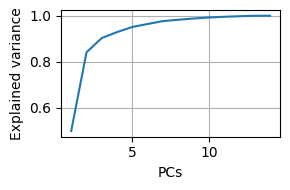

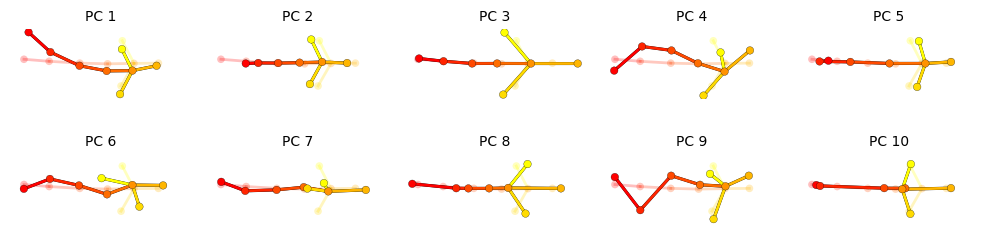

In [37]:
# Plotting before the user's choice of the latent dimensions to use in the next step
from keypoint_moseq import load_pca, plot_scree, plot_pcs
from element_moseq.readers.kpms_reader import load_dj_config

output_dir = (kpms_pca.PCATask & key).fetch1("output_dir")
config = load_dj_config(output_dir, check_if_valid=False, build_indexes=False)

pca = load_pca(output_dir)

plot_scree(pca, project_dir=output_dir)
plot_pcs(pca, project_dir=output_dir, **config)